In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the data
forwards= pd.read_csv('../data/processed/forwards_processed.csv')

# Revised feature set excluding leaked features
features = [
    'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
    'yellow_cards', 'red_cards', 'bonus', 'influence', 'creativity',
    'threat', 'ict_index', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'expected_goals_conceded'
]

# Target variable
target = 'total_points'

# Extract features and target
X = forwards[features]
y = forwards[target]

# Handle missing values
X = X.fillna(X.mean())

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a new Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Check the feature importances again
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Ensure no remaining features are too highly correlated with the target
correlation_matrix = forwards[features + [target]].corr()
print("Correlation with target:\n", correlation_matrix[target].sort_values(ascending=False))


Mean Absolute Error: 9.993404255319149
Mean Squared Error: 269.0595765957448
R^2 Score: 0.9400084741052939
                       Feature  Importance
0                      minutes    0.757433
8                    influence    0.137661
1                 goals_scored    0.053888
7                        bonus    0.015472
11                   ict_index    0.014934
4               goals_conceded    0.009292
10                      threat    0.003133
2                      assists    0.002013
9                   creativity    0.001540
3                 clean_sheets    0.001173
5                 yellow_cards    0.001012
12              expected_goals    0.000767
14  expected_goal_involvements    0.000765
15     expected_goals_conceded    0.000489
13            expected_assists    0.000379
6                    red_cards    0.000050
Correlation with target:
 total_points                  1.000000
minutes                       0.949536
goals_scored                  0.949360
bonus              

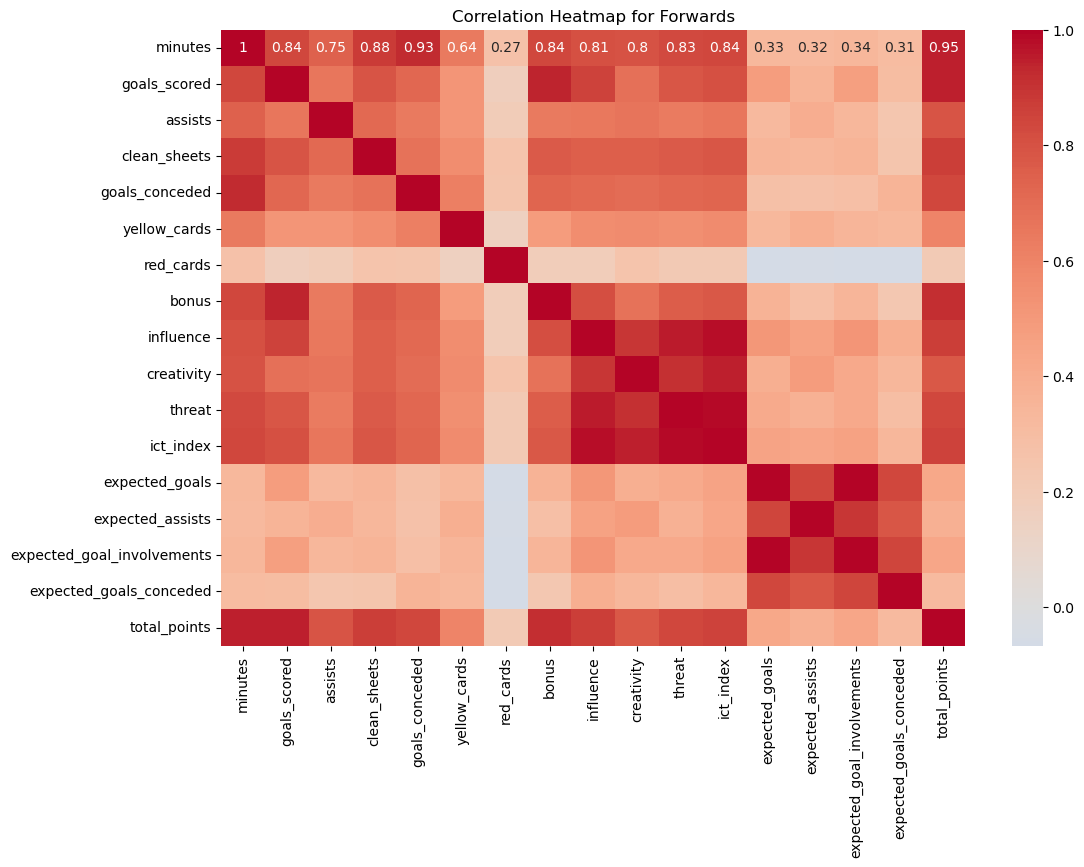

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = forwards[features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Forwards')
plt.show()


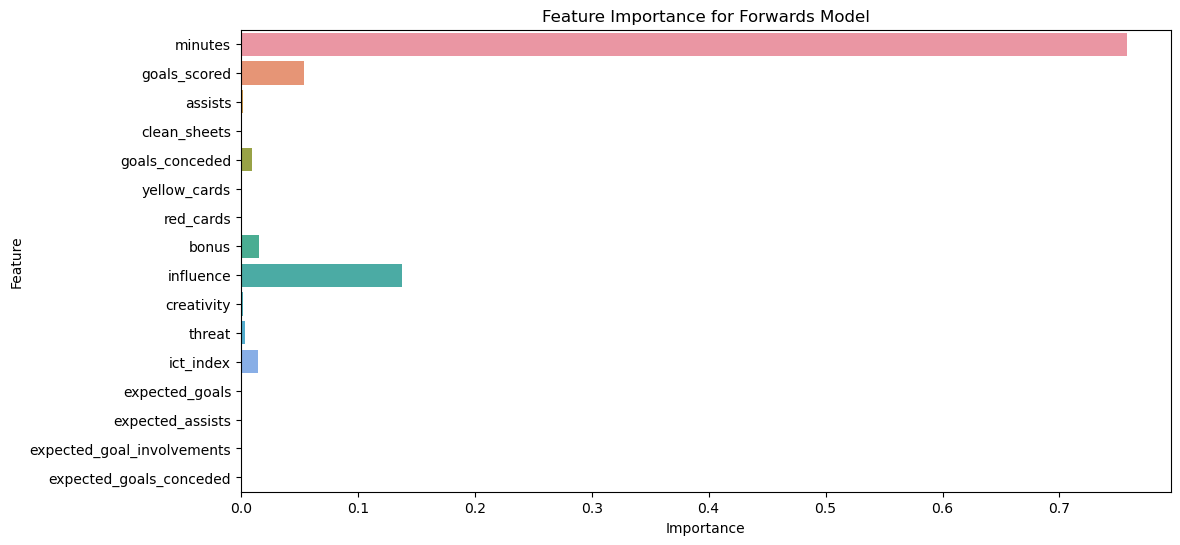

In [4]:
# Feature Importance Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title('Feature Importance for Forwards Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


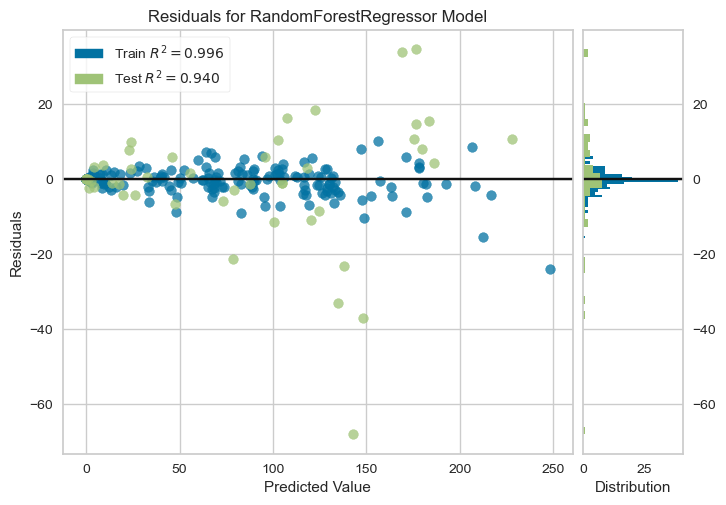

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [5]:
from yellowbrick.regressor import ResidualsPlot

# Initialize ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and show the figure


In [6]:
# Check the feature names in X_train
print("Features in X_train:", X.columns)


Features in X_train: Index(['minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'yellow_cards', 'red_cards', 'bonus', 'influence', 'creativity',
       'threat', 'ict_index', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded'],
      dtype='object')


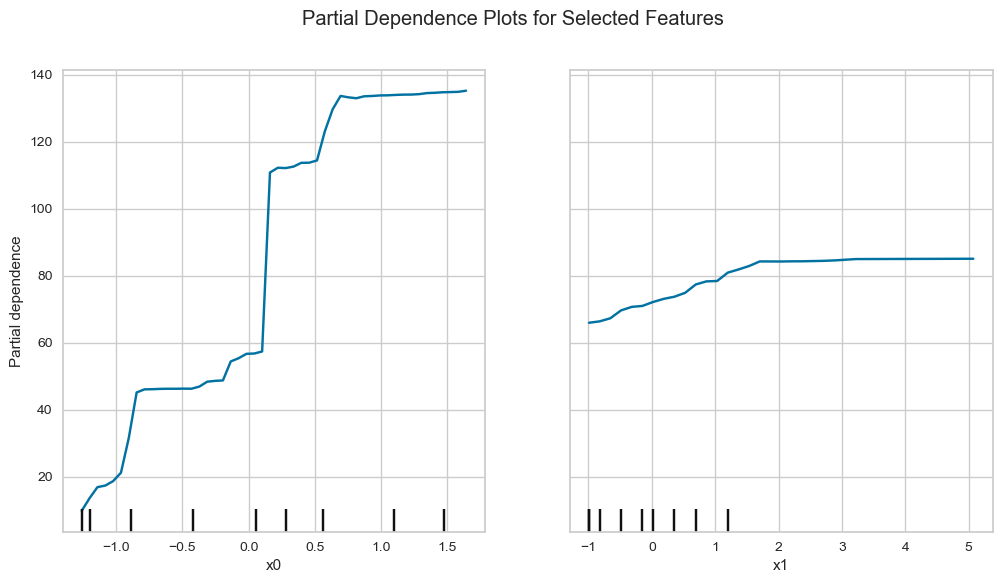

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Refit model if necessary
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Correct the feature names based on what exists in X_train
features_to_plot = [0, 1]  # Use indices or exact names from X_train.columns if different from intended names

# Plot Partial Dependence using the corrected feature references
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=features_to_plot, ax=ax, grid_resolution=50)
plt.suptitle('Partial Dependence Plots for Selected Features')
plt.show()


In [9]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline to scale data and train SVM
svm_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'SVM Mean Absolute Error: {mae_svm}')
print(f'SVM Mean Squared Error: {mse_svm}')
print(f'SVM R^2 Score: {r2_svm}')


SVM Mean Absolute Error: 32.873479441604964
SVM Mean Squared Error: 2099.409027532214
SVM R^2 Score: 0.5319001366451624


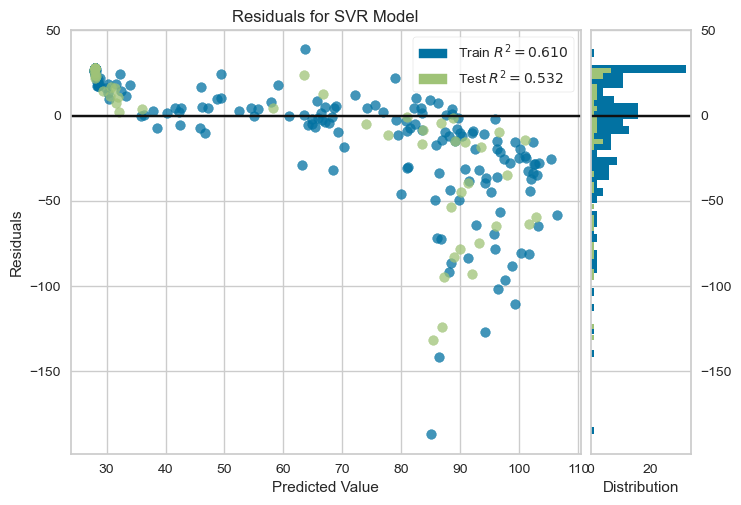

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
#residuals plot for svm
from yellowbrick.regressor import ResidualsPlot

# Initialize ResidualsPlot
visualizer = ResidualsPlot(svm_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and show the figure

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search to find the best parameters
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

# Retrieve the best model from grid search
best_gb_model = grid_search_gb.best_estimator_

# Predict on test data
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Best Parameters: {grid_search_gb.best_params_}')
print(f'Gradient Boosting Mean Absolute Error: {mae_gb}')
print(f'Gradient Boosting Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting R^2 Score: {r2_gb}')


Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200}
Gradient Boosting Mean Absolute Error: 7.428628694967595
Gradient Boosting Mean Squared Error: 154.0340069457117
Gradient Boosting R^2 Score: 0.9656554312867556


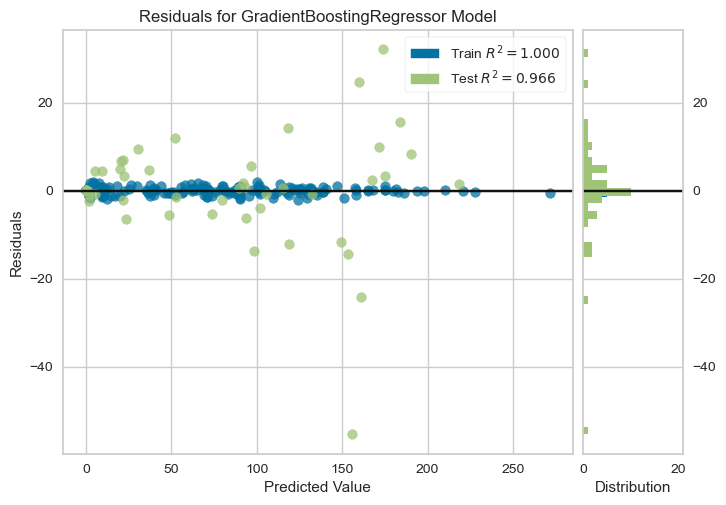

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [12]:
#RESIDUALS PLOT FOR GB
from yellowbrick.regressor import ResidualsPlot

# Initialize ResidualsPlot
visualizer = ResidualsPlot(best_gb_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and show the figure

               Model        MAE          MSE        R2
2  Gradient Boosting   7.428629   154.034007  0.965655
0      Random Forest   9.993404   269.059577  0.940008
1                SVM  32.873479  2099.409028  0.531900


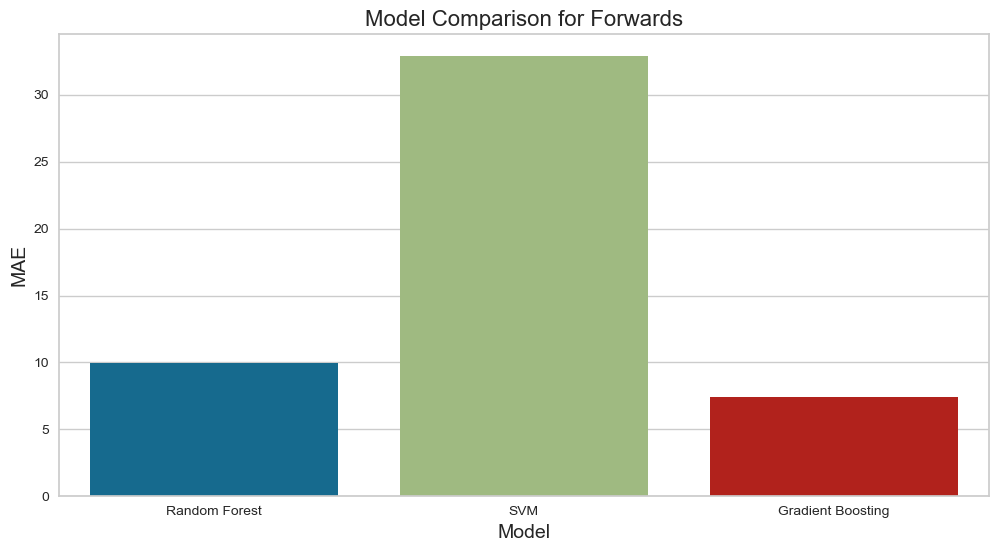

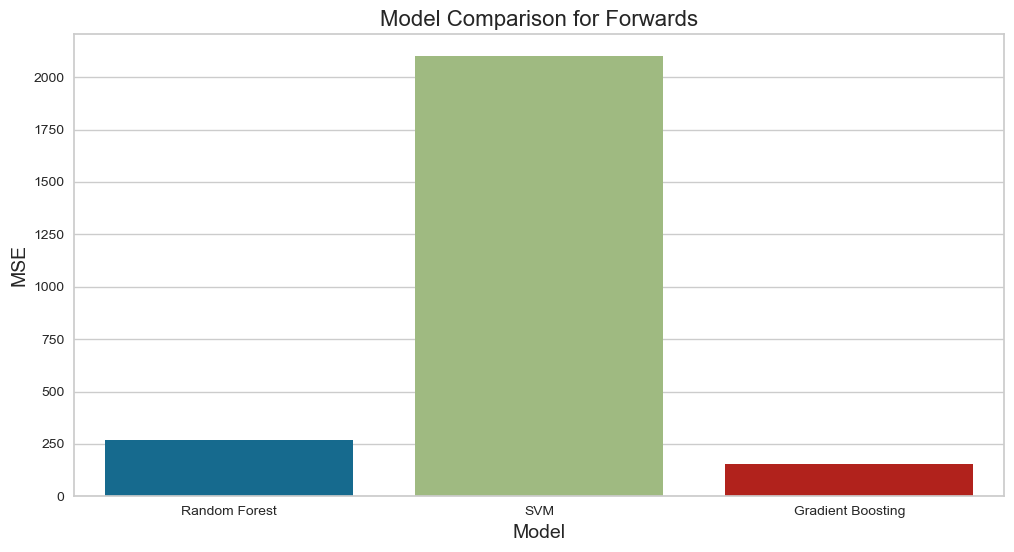

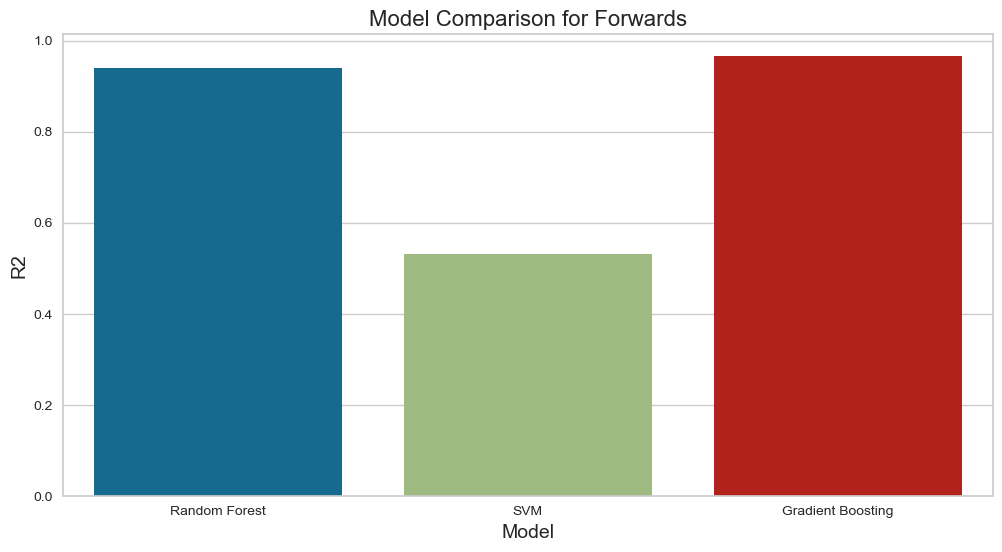

In [28]:
# Compile results into a DataFrame for easy comparison
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Gradient Boosting'],
    'MAE': [mae, mae_svm, mae_gb],
    'MSE': [mse, mse_svm, mse_gb],
    'R2': [r2, r2_svm, r2_gb]
})

print(results.sort_values(by='R2', ascending=False))

#plot the metrics with seaborn for MAE, MSE and R2
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=results)
plt.title('Model Comparison for Forwards', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', data=results)
plt.title('Model Comparison for Forwards', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', data=results)
plt.title('Model Comparison for Forwards', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R2', fontsize=14)
plt.show()

In [14]:
#save the best gb model under the name best_gb_model
import joblib

joblib.dump(best_gb_model, '../models/trained_models/best_gb_model_forward.pkl')

# Load the best GB model
best_gb_model = joblib.load('../models/trained_models/best_gb_model_forward.pkl')

# Check the feature names in X_train
print("Features in X_train:", X.columns)

#print model type
print("Model type:", type(best_gb_model))


Features in X_train: Index(['minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'yellow_cards', 'red_cards', 'bonus', 'influence', 'creativity',
       'threat', 'ict_index', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded'],
      dtype='object')
Model type: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [54]:
# Finalizing and generating final dataset

In [21]:
forwards = pd.read_csv('../data/processed/forwards_processed.csv')

forwards.columns

Index(['season_name', 'element_code', 'start_cost', 'end_cost', 'total_points',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'id_forwards',
       'first_name_forwards', 'second_name_forwards', 'unique_id', 'id_ref',
       'first_name_ref', 'second_name_ref', 'code', 'team', 'id', 'team_name',
       'player_name', 'points_per_game', 'value_for_money'],
      dtype='object')

In [27]:
# Load the full midfielder data
forwards = pd.read_csv('../data/processed/forwards_processed.csv')

# Prepare the features for prediction
feature_columns = ['minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'yellow_cards', 'red_cards', 'bonus', 'influence', 'creativity',
       'threat', 'ict_index', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded']

X_forwards = forwards[feature_columns]

# Scale the features
scaler = StandardScaler()
X_forwards_scaled = scaler.fit_transform(X_forwards)

# Predict the total points for all forwards
predictions = best_gb_model.predict(X_forwards_scaled)

# Scale predictions to max of 100
max_prediction = max(predictions)
scaled_predictions = (predictions / max_prediction) * 100

# Add scaled predictions to the forwards DataFrame
forwards['epl_predictions'] = scaled_predictions

# Keep only the required columns
result_df = forwards[['season_name', 'id', 'first_name_forwards', 'second_name_forwards', 'team', 'epl_predictions']]

# Rename 2023/24 to 2023
result_df.loc[result_df['season_name'] == '2023/24', 'season_name'] = '2023'
# keep only 2023 season
result_df = result_df[result_df['season_name'] == '2023']

# Save the result to CSV
result_df.to_csv('../data/processed/epl_forwards_predictions.csv', index=False)

print("Predictions for all seasons (with 2023/24 renamed to 2023) saved to '../data/processed/epl_forward_predictions.csv'")

# Sort midfielders by EPL_PREDICTIONS and select the top 4
top_midfielders = result_df.sort_values(by='epl_predictions', ascending=False).head(4)

# Display the top 4 midfielders
print(top_midfielders)

Predictions for all seasons (with 2023/24 renamed to 2023) saved to '../data/processed/epl_forward_predictions.csv'
    season_name  id first_name_forwards second_name_forwards  team  \
144        2023  13              Erling              Haaland    13   
72         2023   2               Ollie              Watkins     2   
60         2023  15           Alexander                 Isak    15   
142        2023  18             Dominic     Solanke-Mitchell    18   

     epl_predictions  
144        80.296043  
72         78.158089  
60         64.412974  
142        64.347740  


Photo URL for Erling Haaland: https://www.thesportsdb.com/images/media/player/thumb/gig7ke1684833541.jpg
Photo URL for Ollie Watkins: https://www.thesportsdb.com/images/media/player/thumb/5j7cvh1724687320.jpg
Photo URL for Alexander Isak: https://www.thesportsdb.com/images/media/player/thumb/b3kj061532275016.jpg
Photo URL for Dominic Solanke-Mitchell: None


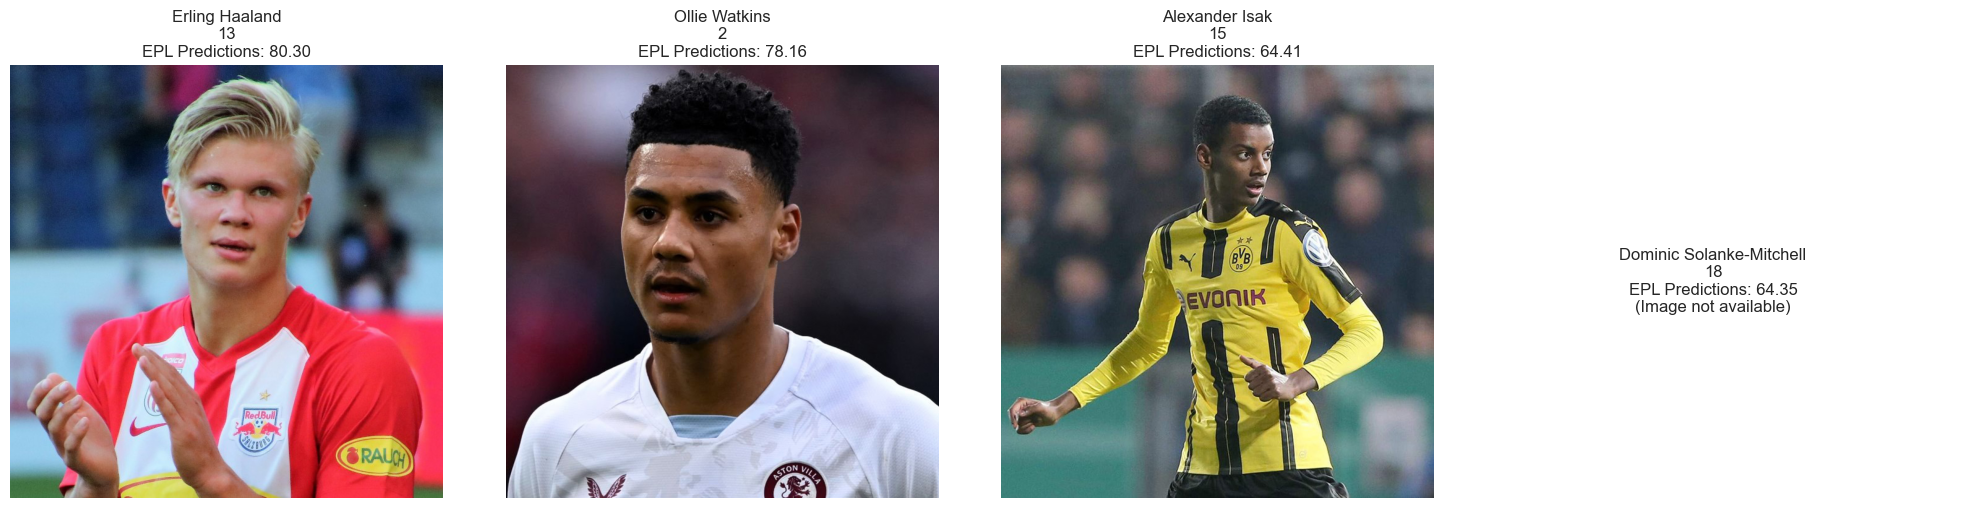

Name: Erling Haaland
Team: 13
EPL Predictions: 80.30
---
Name: Ollie Watkins
Team: 2
EPL Predictions: 78.16
---
Name: Alexander Isak
Team: 15
EPL Predictions: 64.41
---
Name: Dominic Solanke-Mitchell
Team: 18
EPL Predictions: 64.35
---


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import requests
from PIL import Image
from io import BytesIO
#plot the payers picture
# Define the base URL for player photos
photo_base_url = "https://resources.premierleague.com/premierleague/photos/players/110x140/p"

# Function to get the full photo URL for a player
def get_photo_url(photo_id):
    return f"{photo_base_url}{photo_id}.png"

# Sort forwards by EPL_PREDICTIONS and select the top 4
top_forwards = result_df.sort_values(by='epl_predictions', ascending=False).head(4)

def get_player_image_url(player_name):
    base_url = "https://www.thesportsdb.com/api/v1/json/3/searchplayers.php"
    response = requests.get(f"{base_url}?p={player_name}")
    data = response.json()
    if data['player'] and len(data['player']) > 0:
        return data['player'][0]['strThumb']
    return None

# Plot the picture of the top 4 midfielders
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, (_, player) in zip(axes, top_forwards.iterrows()):
    player_name = f"{player['first_name_forwards']} {player['second_name_forwards']}"
    epl_predictions = player['epl_predictions']
    
    # Get the photo URL
    photo_url = get_player_image_url(player_name)
    print(f"Photo URL for {player_name}: {photo_url}")  # Debug print statement
    
    if photo_url:
        try:
            # Fetch and display the image
            response = requests.get(photo_url)
            response.raise_for_status()
            img = Image.open(BytesIO(response.content))
            
            # Display the image with the player's name and EPL predictions
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{player_name}\n{player['team']}\nEPL Predictions: {epl_predictions:.2f}")
            
        except Exception as e:
            print(f"Error loading image for {player_name}: {e}")
            ax.axis('off')
            ax.text(0.5, 0.5, f"{player_name}\n{player['team']}\nEPL Predictions: {epl_predictions:.2f}\n(Image not available)",
                    ha='center', va='center', wrap=True)
    else:
        ax.axis('off')
        ax.text(0.5, 0.5, f"{player_name}\n{player['team']}\nEPL Predictions: {epl_predictions:.2f}\n(Image not available)",
                ha='center', va='center', wrap=True)

plt.tight_layout()
plt.show()

# Print detailed information about top midfielders
for _, player in top_forwards.iterrows():
    print(f"Name: {player['first_name_forwards']} {player['second_name_forwards']}")
    print(f"Team: {player['team']}")
    print(f"EPL Predictions: {player['epl_predictions']:.2f}")
    print("---")

